<a href="https://colab.research.google.com/github/wuke0708/5001/blob/main/CIV_Group2_0501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## 1.Title & Introduction
 - **Project Title:** Analysis of the Survivors of Titanic
 - **Team Members & Roles:**
 *Junting Wu:
 *Hong Xiao
 *Kuangfeng Gong
 *Linyun Zheng
 *Yiran Liu
 *Ziyan Wan
 - **Project Overview & Objectives:**
This analysis examines Titanic passenger data to uncover how demographic factors (e.g., gender, age) and socioeconomic status (cabin class, fare) influenced survival outcomes during the 1912 disaster.  By quantifying the impact of variables like "women and children first" policies, cabin privileges, and family size on survival rates, the study aims to reveal systemic inequalities in evacuation priorities and test historical narratives against empirical evidence.  Through statistical modeling, visualization of disparities, and addressing data gaps (e.g., missing age entries), the project seeks to contextualize the tragedy within broader social hierarchies while deriving insights to inform equitable emergency response protocols in modern crises.

## 2. Dataset Overview & Narrative
### 2.1. Dataset Description
- **Introduction:**
The Titanic dataset, widely sourced from public repositories like Kaggle or historical archives such as the Encyclopedia Titanica, contains records of 891 passengers aboard the RMS Titanic during its ill-fated 1912 maiden voyage. This sample represents approximately 40% of the total passengers and crew (2,224 individuals), with data encompassing demographic, socioeconomic, and travel-specific attributes. Key variables include survival status (Survived: 0/1), passenger class (Pclass: 1st, 2nd, 3rd), name (Name), gender (Sex), age (Age), number of siblings/spouses (SibSp) and parents/children (Parch) aboard, ticket details (Ticket), fare paid (Fare), cabin number (Cabin), and embarkation port (Embarked: C = Cherbourg, Q = Queenstown, S = Southampton). Notable gaps exist, particularly in the Age (≈20% missing) and Cabin (≈77% missing) fields, which require careful handling during analysis. The dataset serves as a critical resource for exploring survival disparities tied to gender, class, and familial relationships during the disaster.
- **Feature Overview:**
 The Titanic dataset includes the following critical features, each contributing uniquely to understanding survival patterns during the disaster:
* Demographic Details
 * Sex: Central to testing the "women and children first" protocol. Historical accounts suggest gender heavily influenced survival, with women prioritized.
 * Age: Helps identify whether children (often defined as （18 years) had higher survival rates, reflecting ethical evacuation priorities. Missing values (~20%) require imputation to avoid bias.
* Socioeconomic Status
 * Pclass (Passenger Class): A proxy for wealth and social hierarchy. Higher classes (1st) had cabin locations closer to lifeboats, potentially increasing survival odds.
 * Fare: Correlates with Pclass; higher fares may indicate better access to resources or evacuation advantages.
* Family Dynamics
 * SibSp (Siblings/Spouses) & Parch (Parents/Children): Combined as family size, these variables explore whether traveling with family improved survival (e.g., group coordination) or hindered it (e.g., slower evacuation).
* Travel-Specific Attributes
 * Cabin: Cabin location (e.g., proximity to decks) might correlate with survival, but ~77% missing data limits direct analysis. Partial codes (e.g., "C123") can infer deck levels for subgroups.
 * Embarked: Embarkation port (Cherbourg, Queenstown, Southampton) may reflect regional socioeconomic differences, indirectly linking to class or survival resources.
* Survival Outcome
 * Survived: Binary target variable (0 = died, 1 = survived) used to model relationships between features and outcomes.
* Relevance to Analysis
 These features collectively reveal how structural inequalities (e.g., class-based resource access) and societal norms (e.g., gender prioritization) shaped life-and-death decisions. For example:
 * Pclass and Fare quantify privilege in crisis access.
 * Sex and Age test the reality of ethical evacuation policies.
 * Missing data (e.g., Age, Cabin) necessitates careful statistical handling to avoid skewed conclusions.

 By analyzing these variables, the study uncovers how historical hierarchies and biases manifest in emergencies—a framework applicable to modern disaster preparedness and equity-focused safety planning.

### 2.2. Formulated Data Questions
- **List of 5 Key Data Questions:**
 Present the seven main questions that will drive your analysis.
- **Categorisation:**
- **EDA Related Questions:**
 Those that can be fully addressed by EDA through visualisations and descriptive statistics.
 1.
 2.
 3.Is the principle of prioritizing women reflected in all age groups (children and adolescents, adults, elderly)
 4.
 5.
 6.
- **ML Related Questions:**
 Questions that require additional investigation via model training and predictive analysis.

 ## 3. Analysis Roadmap
 - **Planned Approach:**
 Outline your step-by-step approach covering:Data Cleaning & Preprocessing Feature EngineeringModelling for ML-focused questions Evaluation Methods and Metrics
 1. Data Cleaning & Preprocessing Objective:
 Resolve data quality issues to prepare for modeling.

 Key Steps:

* Handle Missing Values:
 - Age: Impute missing values using median (robust to outliers) or predictive models (e.g., KNN).
 - Cabin: Treat as categorical (e.g., "Known"/"Unknown") or extract deck letters (e.g., "C" from "C123").
 - Embarked: Replace 2 missing rows with mode (most frequent port).
* Outlier Detection:
 - Check Fare for extreme values (e.g., >99th percentile) and winsorize if needed.
* Data Type Conversion:
 - Convert Sex to binary (0=male, 1=female).
 - Encode Embarked as one-hot vectors (C, Q, S).

2. Feature Engineering
  
  Objective: Create informative features to improve model performance.

  Key Steps:
* Derived Features:
 - Family Size: SibSp + Parch + 1 (1 for self).
 - IsAlone: Binary flag (1 if Family_Size == 1).
 - Title: Extract from Name (e.g., "Mr.", "Miss") to infer social status.
* Binning:
 - Categorize Age into groups (e.g., child: <12, adult: 12-60, senior: >60).
 - Bin Fare into quartiles for non-linear relationships.
* Interaction Terms:
 - Create Pclass_Sex (e.g., "1st_Female") to capture class-gender survival dynamics.

3. Modelling (ML-Focused)
  
  Objective: Build predictive models to identify survival drivers.

* Model Selection:
 - Baseline Model: Logistic Regression (interpretability).
 - Tree-Based Models: Random Forest (handle non-linearities) or XGBoost (gradient boosting).
 - Advanced: Neural Networks (if complex interactions suspected).
* Training Workflow:
 - Split Data: 80% train, 20% test (stratified by Survived).
 - Feature Scaling: Standardize numerical features (e.g., Age, Fare) for SVM/NN.
 - Class Imbalance: Use SMOTE or class weights if survival ratio is skewed.

## 4. Initial Insights [Major Section for Interim Submission]
- **Preliminary Findings:**
 Summarise key insights from your initial EDA.
- **Visualisations & Statistics:**
 Include charts, graphs, or tables that illustrate the main patterns discovered.

Import libiraries

In [ ]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Load data: Convert CSV file into a Pandas dataframe

In [ ]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/wuke0708/5001/refs/heads/main/Titanic-Dataset.csv")

Viewing the dataframe

In [ ]:
#Return number of rows and columns
df.shape,df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [ ]:
#Return first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#take a look at the descriptive statistics of the data below
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According to the table, we can obtain some basic information:
* Survived: about 0.383838 percent survived;
* Pclass: There are more people in cabins 2 and 3 than in cabins 1;
* Age: The average age of all passengers is approximately 29.7 years old. The youngest passenger is 0.42 years old and the oldest is 80 years old.
* Fare: The average fare is 32 yuan, and the highest fare is 512 yuan

Check the missing values

In [ ]:
#Take a look at the data types and the missing situations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Display number missing values per column
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The data shows that there are a total of 891 passengers and 12 columns of features in the training dataset, among which three columns of data are missing:

Age: There are only 714 complete records, and 177 records are missing;

Cabin: Only 204 passengers are known, and 687 records are missing. The number of missing records is quite large;

Embarked : Only two records are missing.

Handling of missing values

In [ ]:
# For missing Embarked values, fill in using the most common categories
df.Embarked[df.Embarked.isnull()] = df.Embarked.dropna().mode().values
# For the Cabin number, since there is too much missing data, the missing data is replaced with 'U0' to indicate unknown
df['Cabin'] = df.Cabin.fillna('U0')
# For age, the average is used to fill in the missing values
df['Age']=df['Age'].fillna( df['Age'].mean() )

In [ ]:
#Return first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


Exploratory analysis

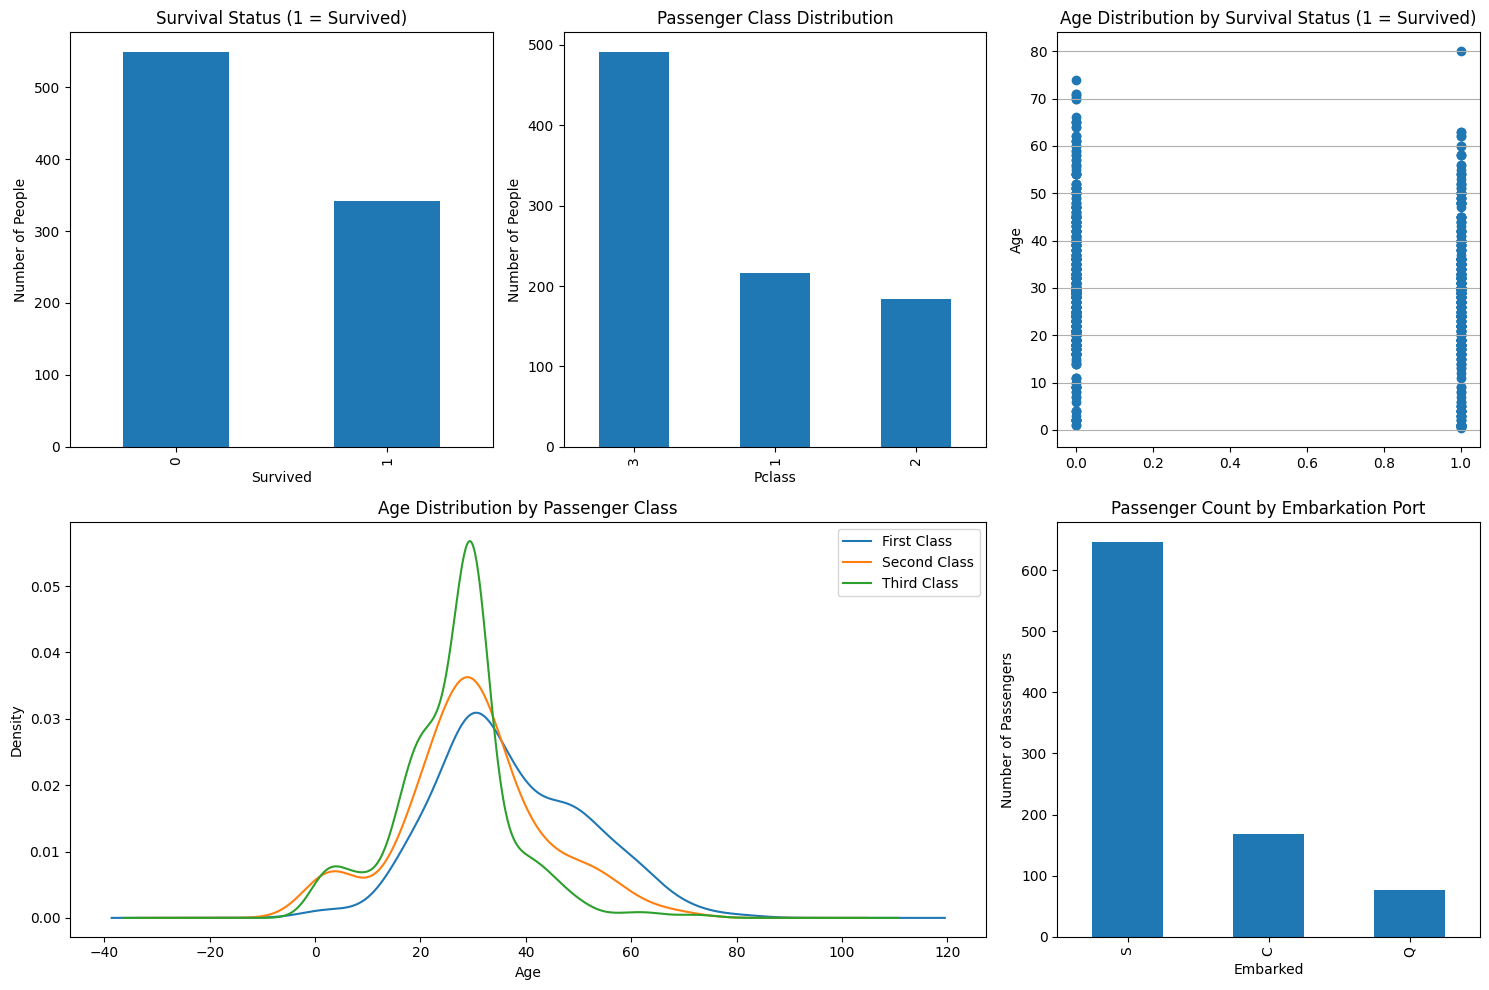

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,10))
fig.set(alpha=0.2)  # Set chart transparency

# Subplot 1: Survival Status
plt.subplot2grid((2,3),(0,0))  # 2 rows, 3 columns, starting from (0,0)
df.Survived.value_counts().plot(kind='bar')
plt.title('Survival Status (1 = Survived)')
plt.ylabel('Number of People')

# Subplot 2: Passenger Class Distribution
plt.subplot2grid((2,3),(0,1))
df.Pclass.value_counts().plot(kind="bar")
plt.ylabel("Number of People")
plt.title("Passenger Class Distribution")

# Subplot 3: Age vs Survival
plt.subplot2grid((2,3),(0,2))
plt.scatter(df.Survived, df.Age)
plt.ylabel("Age")
plt.grid(visible=True, which='major', axis='y')  # Add grid lines
plt.title("Age Distribution by Survival Status (1 = Survived)")

# Subplot 4: Age Distribution by Class
plt.subplot2grid((2,3),(1,0), colspan=2)
df.Age[df.Pclass == 1].plot(kind='kde')  # KDE plot
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution by Passenger Class")
plt.legend(('First Class', 'Second Class', 'Third Class'), loc='best')

# Subplot 5: Embarkation Port Statistics
plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar')
plt.title("Passenger Count by Embarkation Port")
plt.ylabel("Number of Passengers")

plt.tight_layout()  # Auto-adjust layout
plt.show()

Based on the data, put forward some hypotheses

The survival status of each passenger level

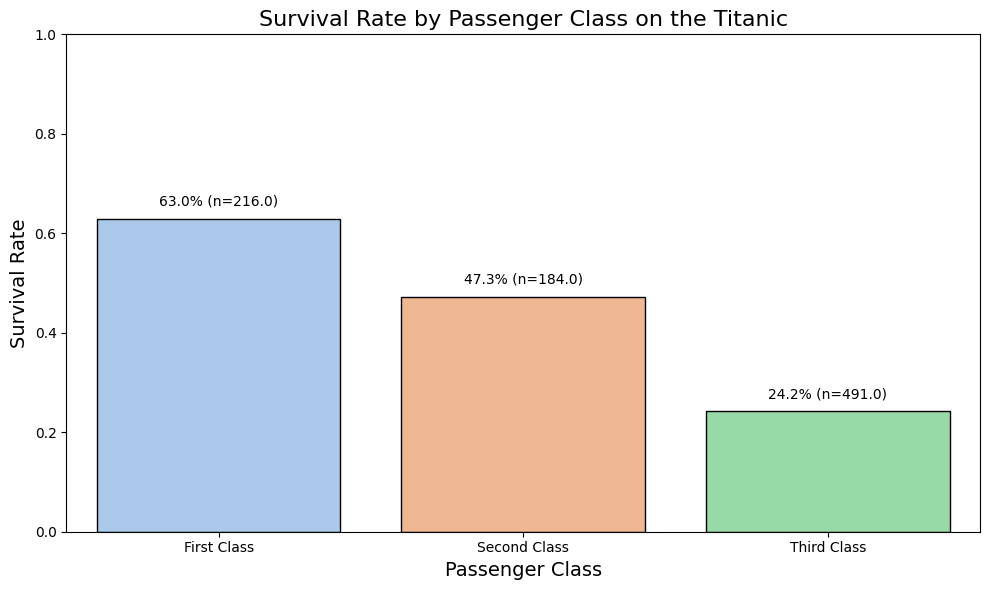

In [ ]:
# Data preparation: Calculate survival rates based on passenger class
class_survival = df.groupby('Pclass')['Survived'].agg(
    Survival_Rate='mean',
    Passenger_Count='count'
).reset_index()

# Visualization setup
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survival_Rate', data=class_survival, palette='pastel',
            capsize=0.1, edgecolor='black')

# Add data labels above the bars
for idx, row in class_survival.iterrows():
    plt.text(idx, row['Survival_Rate'] + 0.02, f"{row['Survival_Rate']:.1%} (n={row['Passenger_Count']})",
             ha='center', va='bottom', fontsize=10)

# Set axis labels and title
plt.title('Survival Rate by Passenger Class on the Titanic', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.ylim(0, 1)
plt.xticks(ticks=[0, 1, 2], labels=['First Class', 'Second Class', 'Third Class'])

# Display the plot
plt.tight_layout()
plt.show()

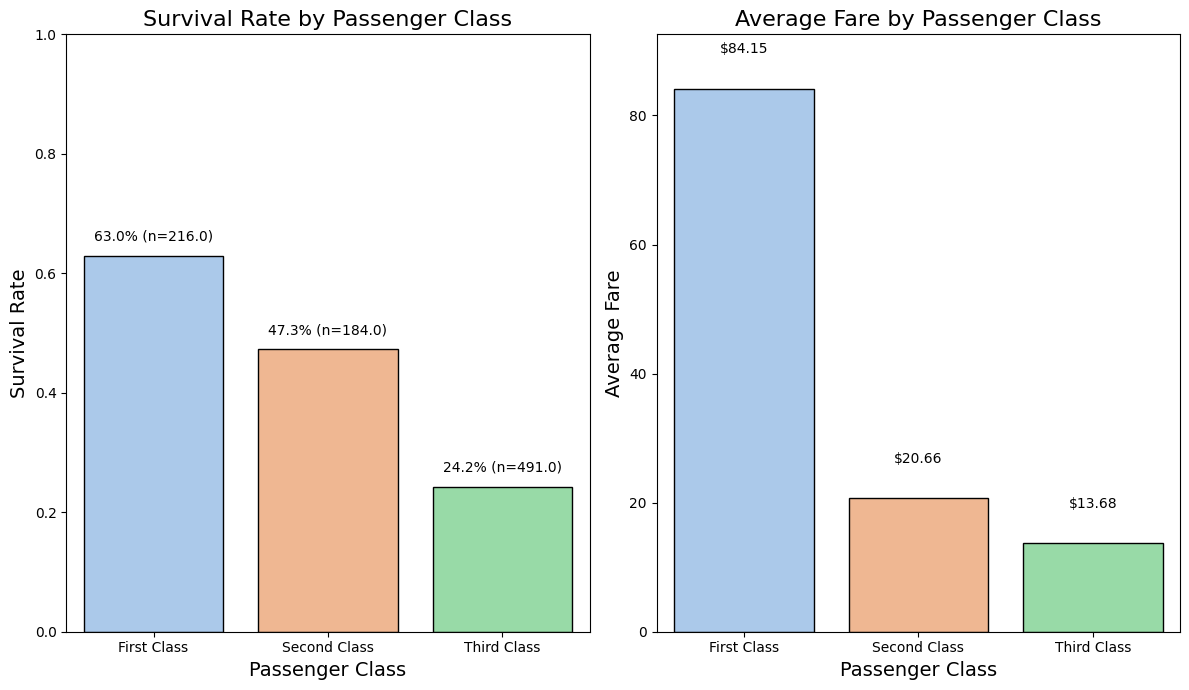

In [ ]:
# Data preparation: Calculate survival rates and average fares based on passenger class
class_survival = df.groupby('Pclass').agg(
    Survival_Rate=('Survived', 'mean'),
    Average_Fare=('Fare', 'mean'),
    Passenger_Count=('PassengerId', 'count')
).reset_index()

# Visualization setup
plt.figure(figsize=(12, 7))

# Create a bar plot for survival rates
plt.subplot(1, 2, 1)
sns.barplot(x='Pclass', y='Survival_Rate', data=class_survival, palette='pastel',
            capsize=0.1, edgecolor='black')
plt.title('Survival Rate by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.ylim(0, 1)
plt.xticks(ticks=[0, 1, 2], labels=['First Class', 'Second Class', 'Third Class'])

# Add data labels for survival rates
for idx, row in class_survival.iterrows():
    plt.text(idx, row['Survival_Rate'] + 0.02, f"{row['Survival_Rate']:.1%} (n={row['Passenger_Count']})",
             ha='center', va='bottom', fontsize=10)

# Create a bar plot for average fares
plt.subplot(1, 2, 2)
sns.barplot(x='Pclass', y='Average_Fare', data=class_survival, palette='pastel',
            capsize=0.1, edgecolor='black')
plt.title('Average Fare by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.ylim(0, class_survival['Average_Fare'].max() * 1.1)
plt.xticks(ticks=[0, 1, 2], labels=['First Class', 'Second Class', 'Third Class'])

# Add data labels for average fares
for idx, row in class_survival.iterrows():
    plt.text(idx, row['Average_Fare'] + 5, f"${row['Average_Fare']:.2f}",
             ha='center', va='bottom', fontsize=10)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

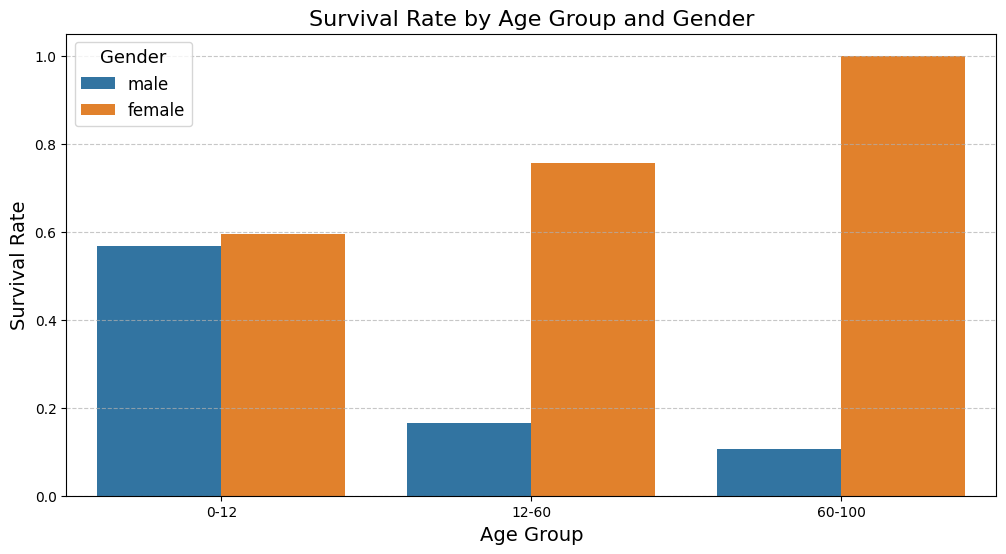

In [ ]:
# Create a new column to group ages
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 60, 100], labels=['0-12', '12-60', '60-100'])

# Combines age and gender factors to analyze survival rates
plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='Survived', hue='Sex', data=df, ci=None)
plt.title('Survival Rate by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.legend(title='Gender', title_fontsize='13', fontsize='12')
plt.grid(visible=True, which='major', axis='y', linestyle='--', alpha=0.7)
plt.show()


Based on the image, we can obtain information:
* The principle of "women first" is very evident in adults and the elderly, with women having significantly higher survival rates than men in these two age groups.
* In the groups of children and adolescents, there is not much difference in survival rates between females and males, which may be due to the principle of "child first" also playing a role.

 ## 5. Questions for Further Work & Next Steps
 - **Outstanding Questions:**
 Identify which of the key questions require deeper ML analysis beyond the initial EDA.
 -**Future Roadmap:**
 Outline your plan for subsequent phases Weeks 9-12, detailing further data preparation,modelling, and integration of the refined data story.

 ## 6. Team Reflection (Interim Checkpoint)
- **Individual Contributions:**
 Provide a brief statement outlining each team member's specific contributions to the project.
 * Junting Wu:
 * Hong Xiao
 * Kuangfeng Gong
 * Linyun Zheng
 * Yiran Liu
 * Ziyan Wan
- **What Worked Well:**
 Discuss effective collaboration methods (e.g., regular meetings, clear role allocation, use of version
control) and successful strategies in exploration or task management.
- **What Could Be Improved:**
 Identify challenges such as miscommunication or uneven workload, and describe planned steps to improve collaboration and efficiency for the remaining phases.